Mushrooms classifications algorithms models comparisons and applications 
The following file represent a series of three algorithms to categorize, classify and eventually decide the edibility of a mushroom. The project doesn’t use a single algorithm or strategy, but several ones. However, before using those, the first part involves in the classification and rename of data included in the table provided. Those data are delivered with a table, with 24 columns representing features of single examples of mushrooms. The data are written using several letters, different from column to column, using always Latin alphabet and letters different from column to column, based on the aspect they are representing in the specific case. This represents a problem for most algorithms since they need numerical data in order to work properly. The problem therefore was overcome thanks to the use of the one-hot conversion, which changes every alphabetic value to a numerical one, as a integer between 0 and 1, by creating a specific column for every letter (intended as original feature) and inserting a 1 if the column[letter] effectively represents the original value, 0 elsewhere (the other column representing other possible letters for the feature). Therefore, the data now can be used with models that otherwise would be impossible, however this adds complexity since the number of columns became considerably bigger and complex. As today, the data have not been refined or cleaned, so the different models operate by using all data available. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("agaricus-lepiota.csv")
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.head(1)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [4]:
df.rename(columns = {
    'p':'Edible',
    'x':'Cap Shape',
    's':'Cap Surface',
    'n':'Cap Color',
    't':'Bruices',
    'p.1':'Odor',
    'f':'Gill Attatchment',
    'c':'Gill Spacing',
    'n.1':'Gill Size',
    'k':'Gill Color',
    'e':'Stalk Shape',
    'e.1':'Stalk Root',
    's.1':'Salk Surface Above Ring',
    's.2':'Stalk Surface Below Ring',
    'w':'Stalk Color Above Ring',
    'w.1':'Stalk Color Below Ring',
    'p.2':'Veil Type',
    'w.2':'Veil Color',
    'o':'Ring Number',
    'p.3':'Ring Type',
    'k.1':'Spore Print Color',
    's.3':'Population',
    'u':'Habitat',
}, inplace = True)
df

,Edible,Cap Shape,Cap Surface,Cap Color,Bruices?,Odor,Gill Attatchment,Gill Spacing,Gill Size,Gill Color,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Ring Number,Ring Type,Spore Print Color,Population,Habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
df = pd.get_dummies(df)

In [6]:
df

,Edible_e,Edible_p,Cap Shape_b,Cap Shape_c,Cap Shape_f,Cap Shape_k,Cap Shape_s,Cap Shape_x,Cap Surface_f,Cap Surface_g,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8119,True,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
8120,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8121,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


<Axes: title={'center': 'Person Correlation of Features'}>

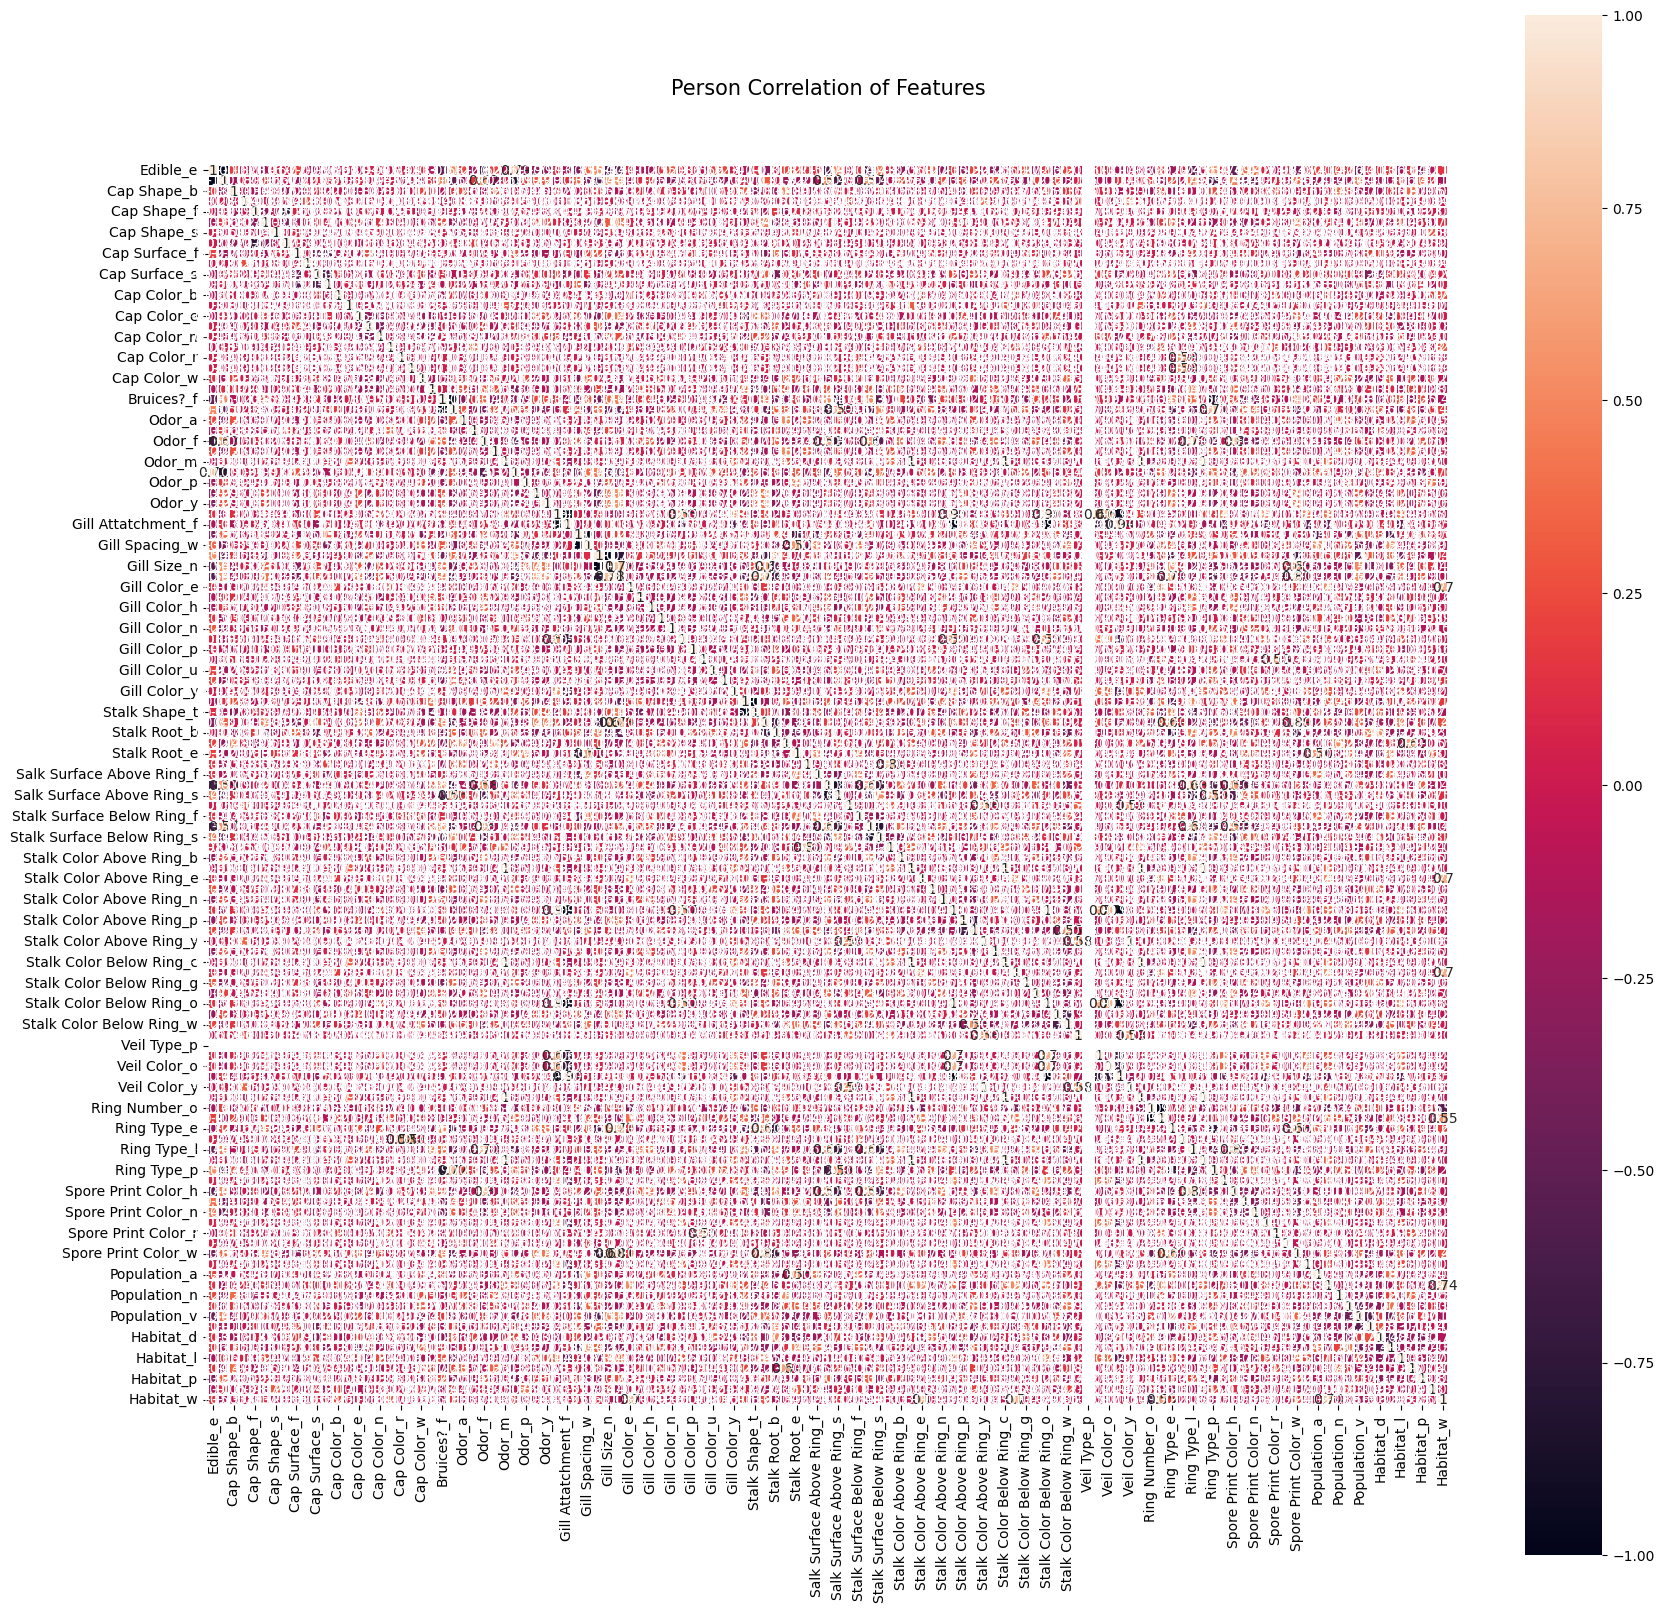

In [7]:
plt.figure(figsize=(20,20))
plt.title('Person Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)

In [8]:
y = df.loc[:,"Edible_e"]
x = df = df.drop(["Edible_e", "Edible_p"], axis=1)
y.head(50)

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16    False
17    False
18    False
19     True
20    False
21     True
22     True
23     True
24    False
25     True
26     True
27     True
28     True
29     True
30    False
31     True
32     True
33     True
34     True
35     True
36    False
37     True
38     True
39     True
40     True
41     True
42    False
43     True
44     True
45     True
46     True
47     True
48     True
49     True
Name: Edible_e, dtype: bool

In [9]:
df.dtypes.tail(50)

Stalk Color Above Ring_g    bool
Stalk Color Above Ring_n    bool
Stalk Color Above Ring_o    bool
Stalk Color Above Ring_p    bool
Stalk Color Above Ring_w    bool
Stalk Color Above Ring_y    bool
Stalk Color Below Ring_b    bool
Stalk Color Below Ring_c    bool
Stalk Color Below Ring_e    bool
Stalk Color Below Ring_g    bool
Stalk Color Below Ring_n    bool
Stalk Color Below Ring_o    bool
Stalk Color Below Ring_p    bool
Stalk Color Below Ring_w    bool
Stalk Color Below Ring_y    bool
Veil Type_p                 bool
Veil Color_n                bool
Veil Color_o                bool
Veil Color_w                bool
Veil Color_y                bool
Ring Number_n               bool
Ring Number_o               bool
Ring Number_t               bool
Ring Type_e                 bool
Ring Type_f                 bool
Ring Type_l                 bool
Ring Type_n                 bool
Ring Type_p                 bool
Spore Print Color_b         bool
Spore Print Color_h         bool
Spore Prin

The cell below is used to create falty data.

In [10]:
#y[:1] = [0 for i in range(1)]

In [11]:
y.head(50)

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16    False
17    False
18    False
19     True
20    False
21     True
22     True
23     True
24    False
25     True
26     True
27     True
28     True
29     True
30    False
31     True
32     True
33     True
34     True
35     True
36    False
37     True
38     True
39     True
40     True
41     True
42    False
43     True
44     True
45     True
46     True
47     True
48     True
49     True
Name: Edible_e, dtype: bool

In [12]:
x

,Cap Shape_b,Cap Shape_c,Cap Shape_f,Cap Shape_k,Cap Shape_s,Cap Shape_x,Cap Surface_f,Cap Surface_g,Cap Surface_s,Cap Surface_y,...,Population_s,Population_v,Population_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8119,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8120,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8121,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


In [13]:
y

0        True
1        True
2       False
3        True
4        True
        ...  
8118     True
8119     True
8120     True
8121    False
8122     True
Name: Edible_e, Length: 8123, dtype: bool

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=18)

As of today, once divided the dataset into training and fitting categories we have implemented the following models:

1)    Decision tree: The first model implemented uses a simple structure where for every possible choice of values, based on the input, one path is taken and the process repeats itself based on the amount of data (and therefore choices) available for the input and deliver a result based on previous choices and values.
2)    KNN neighbourhood models is used with five neighbourhoods and try to classify elements based on how near values are to the database original one. The database is divided into groups, also called neighbourhoods, and every input is confronted on how near is to one of the groups and based on this the aforementioned algorithm makes a prediction on what the input should be. 
3)    Neural network uses several nodes to perform operations and made predictions to be continued

In [15]:
clf = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=5000)

clf.fit(x_train, y_train)
knn.fit(x_train, y_train)
mlp.fit(x_train, y_train)

clf_prediction = clf.predict(x_test)
knn_prediction = knn.predict(x_test)
mlp_prediction = mlp.predict(x_test)


In [16]:
print("Decision tree accuracy:", accuracy_score(y_test, clf_prediction))
print("K-nearest neighbor accuracy:", accuracy_score(y_test, knn_prediction))
print("Neural network accuracy:", accuracy_score(y_test, mlp_prediction))

Decision tree accuracy: 1.0
K-nearest neighbor accuracy: 1.0
Neural network accuracy: 1.0


We got an accuracy of 1.0. This means the algorithm predicted correctly wether the mushrooms in the test set were poisonous or not in every case. Sometimes this can be the result of a data-leakage. To investigate this we added some faulty data to se if our accuracy decreased appropriately. It did. We also tried to locate any bugs by looking through our code. 

After failing to locate any errors, we searched online to see if there were others who had recieved similar results. This seemed to be the case. With this knowledge we felt confident that our results were accurat, and that our model would performe well on new unseen data from the same source as the dataset we were provided.

What does an accuracy of 1 mean? First it is important to note that with a finite dataset it is impossible to test whether a model always gives accurate predictions. With a test data set of 8122 * 0.5 = 4561 we can estimate an accuracy of at least 4561/4562. Secondly, an accuracy of 1 on this dataset tells us how well our model does on data that is generated in the same way that our dataset is. It does not nessecerily tell us anything about a dataset that is generated in a differen. If our model is trained on mushrooms from north-america, it may get larger errors, or be completely useless on mushrooms from china for instance. 

Would you trust it to classify a mushroom for you to eat?

In [19]:
import pickle
fil_navn = "model.sav"
pickle.dump(clf, open(fil_navn, 'wb'))